<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning/blob/master/section-2/assignment-1-boston-housing-solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Predicting Housing Prices from Boston Suburbs

In your first assignment, you will train a model with a real dataset. The [Boston Housing Dataset](http://lib.stat.cmu.edu/datasets/boston) contains information collected in 1978 by the U.S Census Service concerning housing in the area of Boston Mass. Your goal is to create a prediction model of the price of a house based on 13 attributes (features). Those features are:

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than
25,000 sq.ft.
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxides concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to  ve Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property-tax rate per 10000 USD
- PTRATIO: Pupil-teacher ratio by town
- B: Calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
- LSTAT: Percentage lower status of the population


As target variable, we are going to use last column:

- MEDV: Median value of owner-occupied homes 
 

Optionally, you can also compare your results with the [Boston Housing Data Science Contest by Kaggle](https://www.kaggle.com/c/boston-housing). Although the contest has already finished, you can still make a late submission and compare your score with the leaderboard. 



## Getting started

You will have to go through the 5 steps that we've seen in the Video 4:
1. Exploring the data
    - Importing data
    - Understanding the data
2. Preparing the data
    - Scaling
    - Transforming
    - One-Hot Encoding
    - Train/Test Split 
3. Developing a Base Model
4. Checking Predictions
5. Improving Results
6. (Optional) Compare your results on Kaggle

The 4 first steps are partially implemented. You will have to finish them and also implement the step 5.

## 1. Exploring the data

### Importing the dataset
The Boston Housing dataset is available at [keras.io/datasets](https://keras.io/datasets/). Run the next cell in order to download and import the dataset:

In [1]:
import warnings
warnings.filterwarnings("ignore")

from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


Let's explore and understand this dataset.

### Understanding the Dataset (Exploratory Data Analysis)

The dataset was already splited into training (`X_train` and `y_train`) and testing (`X_test` and `y_test`) subsets. As a review, the training set is used for defining the decision boundary of the neural network (i.e., training the model) while the test set is an independent set used for evaluate how good it is the model with unseen data. Let's get some info from those datasets. We are going to convert the training set into a [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) in order to get more statistics:

In [4]:
import pandas as pd
import numpy as np

# TODO: Number of elements in the training set
training_len = len(y_train)

# TODO: Number of elements in the test set
test_len = len(y_test)

# Show the calculated values
print("There are {} houses in the training set".format(training_len))
print("There are {} houses in the test set".format(test_len))

# Convert the training set into a Pandas Dataframe in order to get more statistics:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.DataFrame(np.c_[X_train, y_train], columns = columns)
df.head()

There are 404 houses in the training set
There are 102 houses in the test set


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


The last column was renamed from **MEDV** to **PRICE** in order to provide more semantics about what we want to predict. Now, let's get some statistics about each feature:

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


And finally let's visualize some of those columns with a scatter matrix using [seaborn](https://seaborn.pydata.org/):

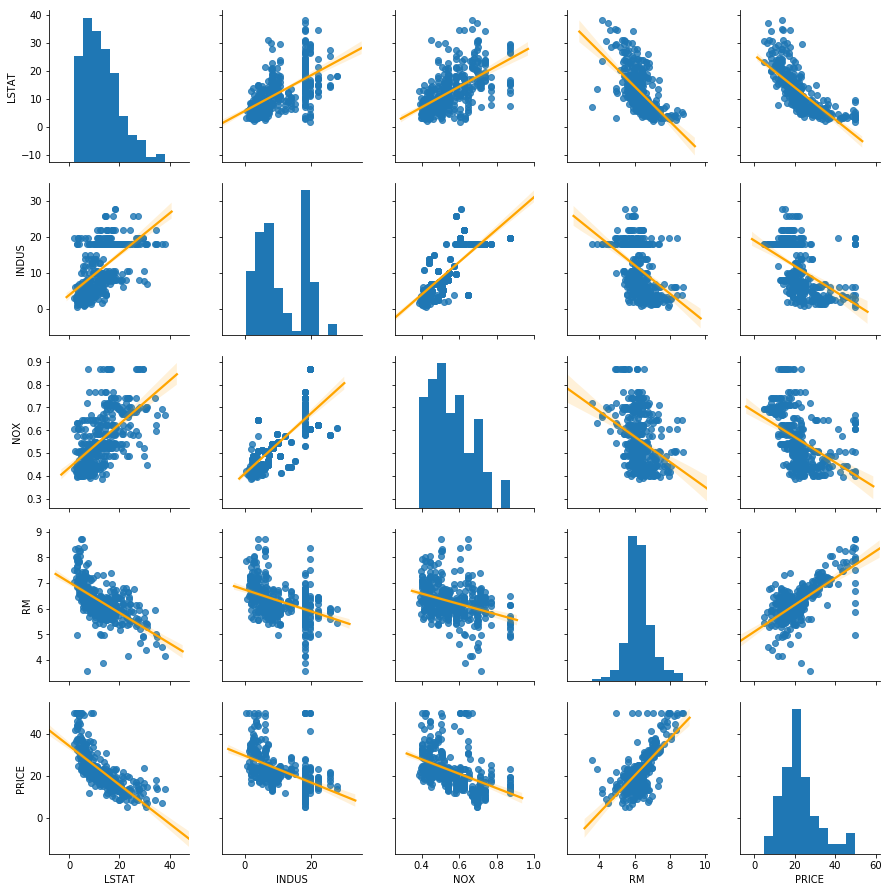

In [6]:
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PRICE'] 
sns.pairplot(df[cols], kind='reg', plot_kws={'line_kws':{'color':'orange'}})
# NOTE: If there's no output, run again!

In the previous chart we can check the trends of some features when compared to others. Especially the last row is important, since allow us to check the trends of some features with the PRICE in the y axis. It is also possible to check some histogram plots. 
> **NOTE:** If the previous line didn't run, it is likely because seaborn is not installed. If you are using hat's your case, just `pip install seaborn` in your terminal. If you are using Google Colab, the Seaborn is already installed by default. 

## 2. Preparing the data
Since the dataset is already splitted into training and testing subsets, it is only missing to scale the dataset.

### 2.1 Assignment - Scaling the training data
Scale the dataset using standard scaller, in the same way it was presented in the video 4:

In [9]:
print("*** Before Scaling ***")
print("Mean of each feature in the training set\n{}".format(np.round(np.mean(X_train, axis=0))))
print("Standard deviation of each feature in the training set\n{}".format(np.round(np.std(X_train, axis=0))))

# Function to standardize the training data
def standardize(X, X_mean, X_std):
    return (X-X_mean)/X_std

# Get mean of each column in the training set
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Apply standardization to the features in the training and test sets
X_train = standardize(X_train, X_mean, X_std)
X_test = standardize(X_test, X_mean, X_std)

print("\n*** After Scaling ***")
print("Mean of each feature in the training set\n{}".format(np.round(np.mean(X_train, axis=0))))
print("Standard deviation of each feature in the training set\n{}".format(np.round(np.std(X_train, axis=0))))

*** Before Scaling ***
Mean of each feature in the training set
[  4.  11.  11.   0.   1.   6.  69.   4.   9. 406.  18. 355.  13.]
Standard deviation of each feature in the training set
[  9.  24.   7.   0.   0.   1.  28.   2.   9. 166.   2.  94.   7.]

*** After Scaling ***
Mean of each feature in the training set
[-0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0.]
Standard deviation of each feature in the training set
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3. Developing a Base Model
For the loss function, let's use the same that is required in the Kaggle contest, the Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\sum_i^n{(y_i - \hat{y}_i)^2}}$$


In [0]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 


Now let's run the first and simplest version of our model, in the same way it was done in Video 4:

In [12]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import warnings
warnings.filterwarnings("ignore")

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(13,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss=[root_mean_squared_error])


# 3. Train your model
model.fit(X_train, y_train)

Epoch 1/1
404/404 [==============================] - 0s 318us/step - loss: 22.3383


When compared to the Video 4, the input shape was increased to 13 since there are 13 features. 

## 4. Checking Predictions
Let's check some numerical and visual results:


**** Evaluating the Test set ****
102/102 [==============================] - 0s 351us/step
Test Loss: 22.551


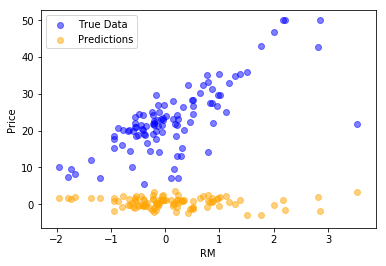

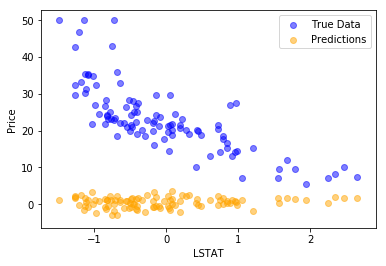

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def check_predictions(model, X, y, cols):
    print("\n**** Evaluating the Test set ****")
    loss_test = model.evaluate(X, y)
    print("Test Loss: {:.3f}".format(loss_test))
    
    for column in cols:
        y_pred = model.predict(X)
        idx = columns.index(column)
        plt.scatter(X[:, idx], y, c='b', alpha=0.5, label="True Data")
        plt.scatter(X[:, idx], y_pred, c='orange', alpha=0.5, label="Predictions")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.legend(loc=0)
        plt.show()
    
check_predictions(model, X_test, y_test, ['RM', 'LSTAT'])

We can check both numerically and visually that the results are very bad. Ideally we want a R2 Score close to 1. A value of -7 indicates that the model is very bad. We an also confirm this when comparing the true data and predictions in two features. Your job is going to be to improve those results:

## 5. Improving Results

Now it is your turn! Try yourself some techniques for improving the previous results. First of all, let's learn how to add hidden layers and activation functions in a model. 

### Adding Hidden Layers and Activation Functions
Here are some examples of how some illustrated architectures from [Playground Tensorflow](https://playground.tensorflow.org/) would be programmed in keras:

#### Example: One input layer, 4 Hidden layers (6, 5, 5 and 4 units with ReLu activations) and One Output Layer (sigmoid activation):

- **Illustration:**
![screen shot 2019-02-16 at 14 31 43](https://user-images.githubusercontent.com/5733246/52902488-7967b180-31f8-11e9-84a2-fcb4ffd24159.png)

- **Model in Keras:**

```
model = Sequential([
    Dense(units=6, input_shape=(2,), activation='relu')),
    Dense(units=5, activation='relu')),
    Dense(units=5, activation='relu')),
    Dense(units=4, activation='relu')),
    Dense(1, activation='sigmoid')
])
```

### Improving the Base Model
Here are some ideas:

- Increase the number of hidden layers and add activation functions:
    - As a [rule of thumb](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw), you can start trying one hidden layer with the number of neurons in that layer as the mean of the neurons in the input plus output layers. 
    - Here's an example **two hidden layers** with 13 neurons in the first hidden layer and 7 units in the second hidden layer. ReLu activation function functions in the two hidden layers. One neuron in the output layer with no activation function (since it is a regression problem):
    ```
    model = Sequential([
        Dense(units=13, input_shape=(13,), activation='relu'),
        Dense(units=7, activation='relu'),
        Dense(1)
    ])
    ```
    Use it as your starting point! 
- Increase the number of epochs
- Tune the learning rate
- Change the optimizer


In [24]:
# 0. TODO: Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. TODO: Define your base model here
model = Sequential([
  Dense(units=13, input_shape=(13,), activation='relu'),
  Dense(units=7, activation='relu'),
  Dense(1)
])


# 2. TODO: Set your optimizer and loss function here
opt = Adam(lr=0.1)

model.compile(optimizer=opt,
             loss=[root_mean_squared_error])

# 3. Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 404 samples, validate on 102 samples
Epoch 1/5
404/404 [==============================] - 1s 2ms/step - loss: 11.3807 - val_loss: 6.4036
Epoch 2/5
404/404 [==============================] - 0s 149us/step - loss: 4.6968 - val_loss: 3.6558
Epoch 3/5
404/404 [==============================] - 0s 152us/step - loss: 3.2252 - val_loss: 3.5325
Epoch 4/5
404/404 [==============================] - 0s 144us/step - loss: 2.6759 - val_loss: 3.0128
Epoch 5/5
404/404 [==============================] - 0s 149us/step - loss: 2.5847 - val_loss: 3.3825


Now let's check the prediction in the test set:


**** Evaluating the Test set ****
102/102 [==============================] - 0s 145us/step
Test Loss: 3.382


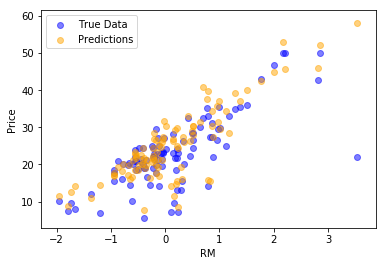

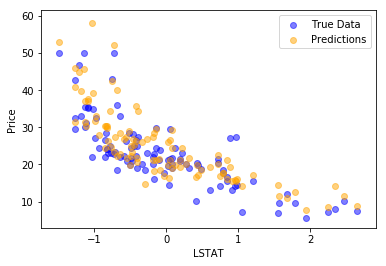

In [25]:
check_predictions(model, X_test, y_test, ['RM', 'LSTAT'])

## 6. (Optional) Submit to Kaggle
Although the contest is already finished, you can try submitting as a late submission on Kaggle and compare your score with other competitors in the [leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard). You just have to click in the button "Late Submission" in the [contest page](https://www.kaggle.com/c/boston-housing) and then upload a CSV file in the submission format of the contest (ID and predictions). 

In order to try yourself, make sure to first the download the test.csv file in [kaggle.com/c/boston-housing/data](https://www.kaggle.com/c/boston-housing/data) and add it in the folder of your project. If you are using Colab, you might have to mount Google Drive first.

In [0]:
USING_COLAB = False

if USING_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    # Update here with the folder of the files of your course
    !cd '/content/drive/My Drive/course/day-1'
    

TEST_PATH = 'kaggle_boston_housing_test.csv'

# Load the test.csv file
testdf = pd.read_csv(TEST_PATH)
testdf.head()

Next, run the following cell in order to create a csv submission file based on your model:

In [0]:
# Get the column with the IDs
ids = testdf['ID'].values

# Apply Standard transform in the test set
X_test_kaggle = testdf.drop('ID', axis=1)
X_test_kaggle_std = sc.fit_transform(X_test_kaggle)

# Get predictions
y_pred_kaggle = model.predict(X_test_kaggle_std)

# Convert to a dataframe in the submission format
submit = pd.DataFrame(np.c_[ids, y_pred_kaggle], columns=['ID', 'medv'])
submit['ID'] = submit['ID'].astype(int)

# Convert to a CSV file
submit.to_csv('my_submission_improved_model.csv', index=False)

Below is my best score. You can compare your best score in the [leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard):
![screen shot 2019-02-15 at 18 14 04](https://user-images.githubusercontent.com/5733246/52882019-824f7900-314d-11e9-97d7-17e48e4a1770.png)
